In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_csv("signal-data.csv")
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [110]:
null_colums=df.isnull().sum()
null_colums=null_colums[null_colums>500].index
null_colums

Index(['72', '73', '85', '109', '110', '111', '112', '157', '158', '220',
       '244', '245', '246', '247', '292', '293', '345', '346', '358', '382',
       '383', '384', '385', '492', '516', '517', '518', '519', '578', '579',
       '580', '581'],
      dtype='object')

In [111]:
df.duplicated().sum()

np.int64(0)

In [112]:
### droping the excess 
df.drop(columns=null_colums,inplace=True)

In [113]:
len(df.columns)

560

In [114]:
df["Time"].sample(5)

1027    2008-09-23 08:11:00
636     2008-01-09 22:05:00
3       2008-07-19 14:43:00
678     2008-02-09 11:47:00
133     2008-06-08 09:57:00
Name: Time, dtype: object

In [115]:
def extracting_year(lst):
    date=lst[0]
    year=date.split("-")
    return year[0]
def extracting_month(lst):
    date=lst[0]
    year=date.split("-")
    return year[1] 
df["Year"]=df["Time"].str.split().apply(extracting_year)
df["Month"]=df["Time"].str.split().apply(extracting_month)

In [116]:
df.drop(columns=["Time"],inplace=True)

In [117]:
df["Month"].value_counts()

Month
08    471
09    413
10    123
07    114
02     98
06     67
05     62
01     51
03     50
04     49
11     35
12     34
Name: count, dtype: int64

from here we can see that the majority of the data with respect to month is present in only 4 months

In [118]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,583,584,585,586,587,588,589,Pass/Fail,Year,Month
1287,3007.39,2504.01,2209.8000,1175.5508,1.1464,100.0,112.1367,0.1227,1.5456,-0.0051,...,0.0169,0.0037,3.3924,0.0184,0.0148,0.0054,80.1759,-1,2008,04
1408,3171.42,2634.43,2217.0000,1436.8313,1.6604,100.0,93.6611,0.1199,1.4193,0.0033,...,0.0257,0.0059,5.1277,0.0299,0.0216,0.0062,72.0230,-1,2008,07
811,3042.85,2403.21,2204.5445,2076.6730,1.0961,100.0,95.9222,0.1251,1.4005,0.0032,...,0.0128,0.0035,2.5914,0.0111,0.0069,0.0021,62.3602,-1,2008,12
47,3055.97,2788.40,2166.5222,907.0746,1.0647,100.0,104.5211,0.1221,1.5179,0.0114,...,0.0127,0.0030,2.5589,0.0149,0.0164,0.0052,110.5454,-1,2008,07
1060,3063.64,2519.77,2231.6111,2005.8966,1.2969,100.0,93.7522,0.1234,1.3704,0.0152,...,0.0159,0.0039,3.1946,0.0189,0.0059,0.0017,31.0252,-1,2008,09


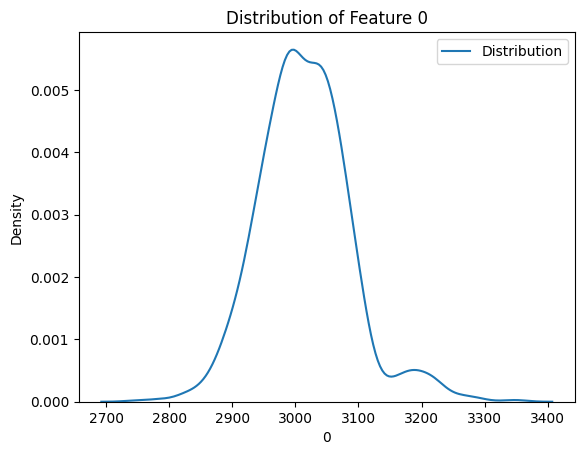

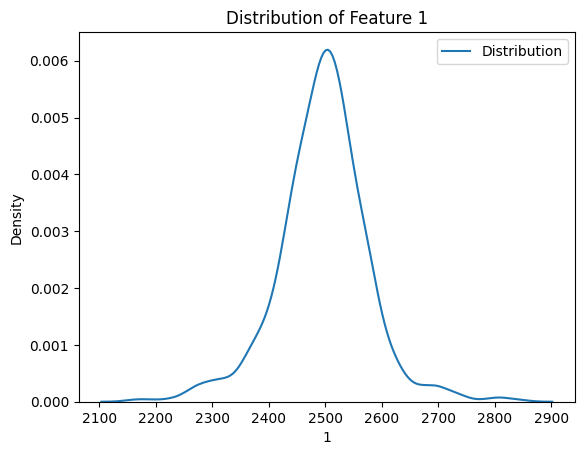

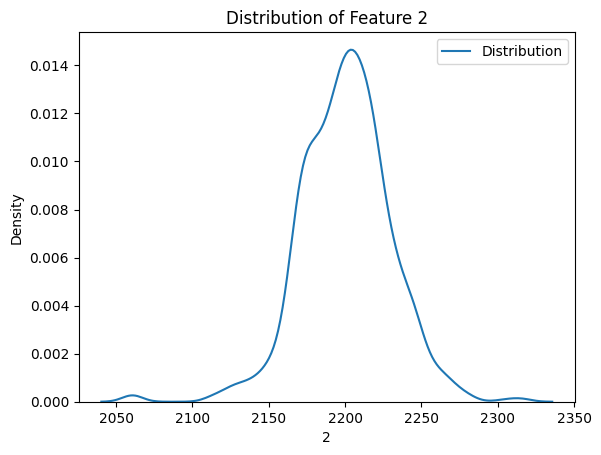

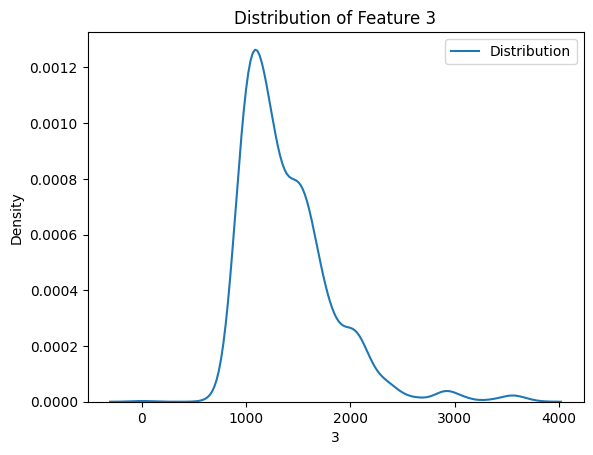

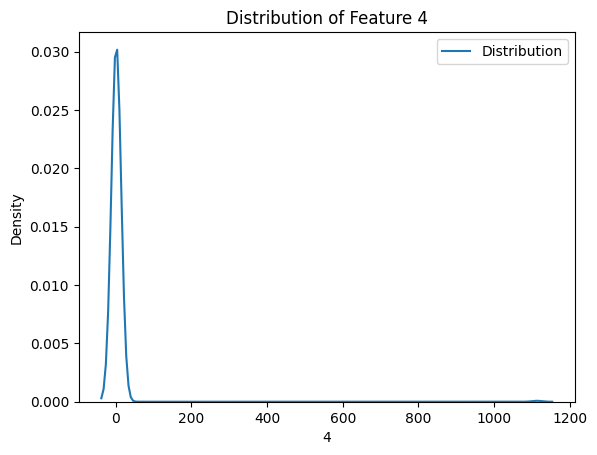

/tmp/ipykernel_4533/2900616347.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[str(col)],label='Distribution')
/tmp/ipykernel_4533/2900616347.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


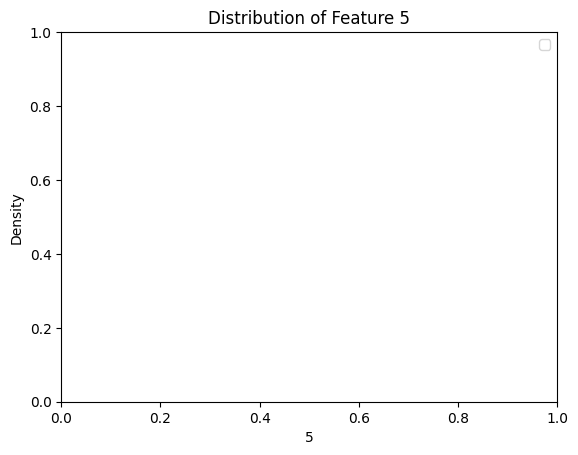

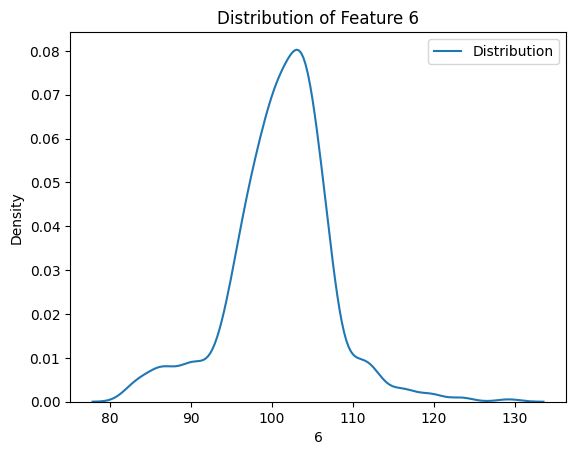

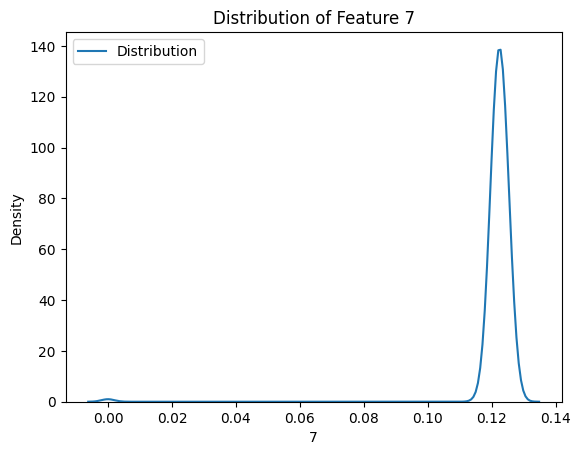

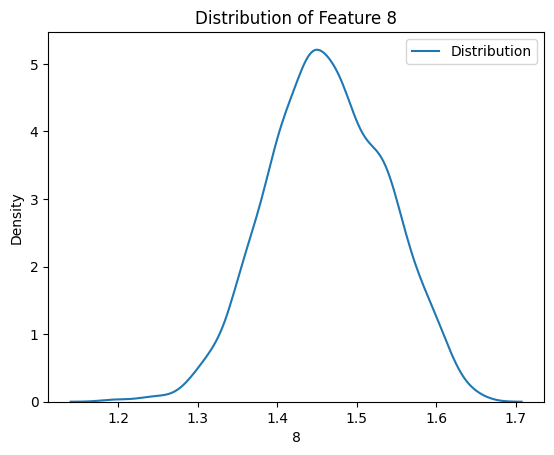

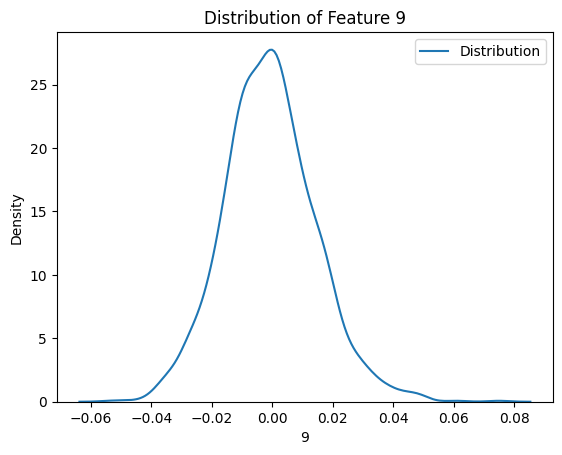

In [119]:
for col in range(0,10):
    sns.kdeplot(df[str(col)],label='Distribution')
    plt.title(f'Distribution of Feature {col}')
    plt.legend()
    plt.show()

In [120]:
X=df.drop(columns=["Pass/Fail"])
y=df["Pass/Fail"]

In [121]:
X.select_dtypes(include="O")

,Year,Month
0,2008,07
1,2008,07
2,2008,07
3,2008,07
4,2008,07
...,...,...
1562,2008,10
1563,2008,10
1564,2008,10
1565,2008,10


In [122]:
X["Year"]=X["Year"].astype(int)
X["Month"]=X["Month"].astype(int)

In [123]:
X.select_dtypes(include="O")

""
0
1
2
3
4
...
1562
1563
1564
1565


In [124]:
### first we need to do the imputation 

In [125]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer()
X_impute=SI.fit_transform(X)

In [126]:
X_impute = pd.DataFrame(X_impute, columns=X.columns, index=X.index)
X_impute

,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,Year,Month
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,...,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,2008.0,7.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,...,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,2008.0,7.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,...,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,2008.0,7.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,...,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,2008.0,7.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,...,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,2008.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,0.4988,0.0143,0.0039,2.8669,0.006800,0.013800,0.004700,203.172000,2008.0,10.0
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,0.4975,0.0131,0.0036,2.6238,0.006800,0.013800,0.004700,203.172000,2008.0,10.0
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,-0.000841,...,0.4987,0.0153,0.0041,3.0590,0.019700,0.008600,0.002500,43.523100,2008.0,10.0
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.462200,-0.007200,...,0.5004,0.0178,0.0038,3.5662,0.026200,0.024500,0.007500,93.494100,2008.0,10.0


In [127]:
### now we need to handle skewness of the data

In [136]:
skew_data = pd.DataFrame(X_impute.skew(), columns=["skew"])

In [137]:
def type_check(skew_value, threshold=0.5):
    if skew_value > threshold:
        return "Right Skewed"
    elif skew_value < -threshold:
        return "Left Skewed"
    else:
        return "Normal"

skew_data["type"] = skew_data["skew"].apply(type_check)

<Axes: xlabel='type'>

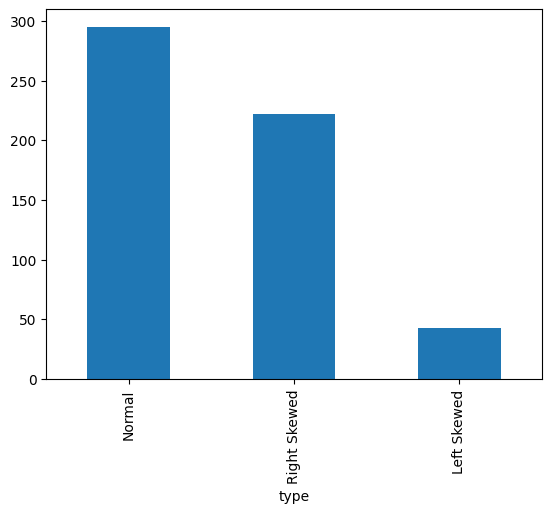

In [140]:
skew_data["type"].value_counts().plot(kind="bar")

In [138]:
right_skew_data = skew_data[skew_data["type"] == "Right Skewed"].index
left_skew_data = skew_data[skew_data["type"] == "Left Skewed"].index

In [139]:
def safe_log_transform(df, cols):
    df_copy = df.copy()
    for col in cols:
        df_copy[col] = np.log1p(df_copy[col].clip(lower=0))
    return df_copy

def safe_power_transform(df, cols):
    df_copy = df.copy()
    for col in cols:
        df_copy[col] = np.power(df_copy[col], 2)
    return df_copy

In [141]:
X_impute_skew = X_impute.copy()
X_impute_skew = safe_log_transform(X_impute_skew, right_skew_data)
X_impute_skew = safe_power_transform(X_impute_skew, left_skew_data)

In [145]:
X_impute_skew.skew().apply(type_check).value_counts()

Normal          353
Right Skewed    178
Left Skewed      29
Name: count, dtype: int64

In [146]:
### we will left the rest of the skewness for now

In [147]:
### standardizing the data

In [148]:
y

0      -1
1      -1
2       1
3      -1
4      -1
       ..
1562   -1
1563   -1
1564   -1
1565   -1
1566   -1
Name: Pass/Fail, Length: 1567, dtype: int64

In [149]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_scaled=st.fit_transform(X_impute_skew)
y = y.replace(-1, 0)

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [151]:
print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

Train class distribution:
 Pass/Fail
0    1170
1      83
Name: count, dtype: int64
Test class distribution:
 Pass/Fail
0    293
1     21
Name: count, dtype: int64


In [152]:
### using SMOTE to balance it

In [158]:
np.isnan(X_train).any()
print("NaNs in original X:", np.isnan(X).sum())

NaNs in original X: 0         6
1         7
2        14
3        14
4        14
         ..
587       1
588       1
589       1
Year      0
Month     0
Length: 560, dtype: int64


In [160]:
### we again have some missing values ????
X_train=SI.fit_transform(X_train)
X_test=SI.transform(X_test)

In [161]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<Axes: xlabel='Pass/Fail'>

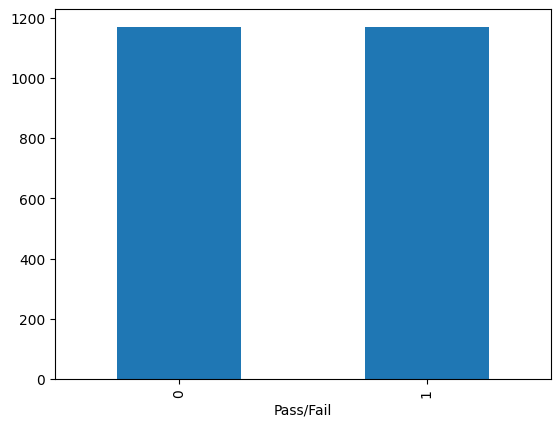

In [163]:
y_train_resampled.value_counts().plot(kind="bar")

In [164]:
#### now PCA

In [173]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train_resampled)

X_test_pca = pca.transform(X_test)


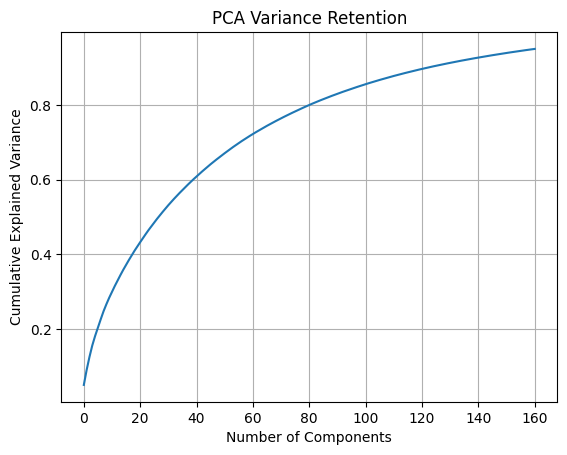

In [174]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Retention')
plt.grid(True)
plt.show()


In [175]:
print("Number of PCA components:", pca.n_components_)

Number of PCA components: 161


In [176]:
### again doing it with updated number of components

In [177]:
from sklearn.decomposition import PCA

pca = PCA(n_components=70)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)


In [178]:
print("Explained variance with 70 components:", np.sum(pca.explained_variance_ratio_))

Explained variance with 70 components: 0.7591424286645033


In [179]:
### Model Traning

In [180]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Ridge Classifier": RidgeClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVC": SVC(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_pca, y_train_resampled)
    y_pred = model.predict(X_test_pca)
    
    print(f"\n{name} Evaluation")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))
    
    results[name] = {
        "model": model,
        "y_pred": y_pred
    }



Logistic Regression Evaluation
[[242  51]
 [ 12   9]]
              precision    recall  f1-score   support

           0     0.9528    0.8259    0.8848       293
           1     0.1500    0.4286    0.2222        21

    accuracy                         0.7994       314
   macro avg     0.5514    0.6273    0.5535       314
weighted avg     0.8991    0.7994    0.8405       314


Ridge Classifier Evaluation
[[223  70]
 [ 12   9]]
              precision    recall  f1-score   support

           0     0.9489    0.7611    0.8447       293
           1     0.1139    0.4286    0.1800        21

    accuracy                         0.7389       314
   macro avg     0.5314    0.5948    0.5123       314
weighted avg     0.8931    0.7389    0.8002       314


Decision Tree Evaluation
[[252  41]
 [ 20   1]]
              precision    recall  f1-score   support

           0     0.9265    0.8601    0.8920       293
           1     0.0238    0.0476    0.0317        21

    accuracy              

In [181]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('svc', SVC(probability=True, class_weight='balanced', random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)),
    ('gbc', GradientBoostingClassifier(random_state=42))
], voting='soft')

voting.fit(X_train_pca, y_train_resampled)
y_pred_vote = voting.predict(X_test_pca)


In [182]:
print(f"\n{name} Evaluation")
print(confusion_matrix(y_test, y_pred_vote))
print(classification_report(y_test, y_pred_vote, digits=4))


SVC Evaluation
[[290   3]
 [ 20   1]]
              precision    recall  f1-score   support

           0     0.9355    0.9898    0.9619       293
           1     0.2500    0.0476    0.0800        21

    accuracy                         0.9268       314
   macro avg     0.5927    0.5187    0.5209       314
weighted avg     0.8896    0.9268    0.9029       314



In [183]:
### doing the hyperparameter tuning on SVC and Logistic Regression

In [184]:
### for Logistic Regression

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=1000, random_state=42)

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # liblinear supports both l1 and l2
    'class_weight': ['balanced']
}

grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='f1', verbose=2)
grid_logreg.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_logreg.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, penalty=l1,

In [186]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=42)

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='f1', verbose=2)
grid_svc.fit(X_train, y_train)

print("Best SVC Params:", grid_svc.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=linear; total time=   0.7s
[CV] END 

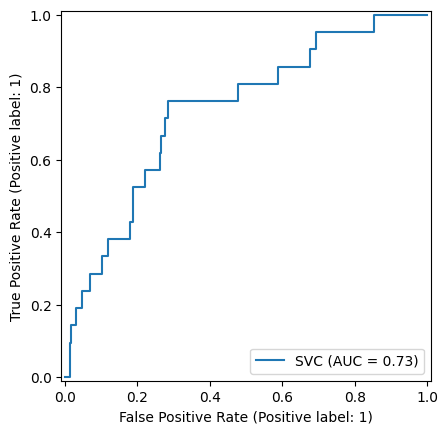

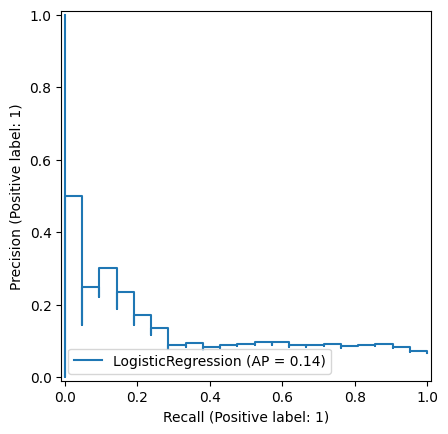

In [188]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
RocCurveDisplay.from_estimator(grid_svc.best_estimator_, X_test, y_test)
PrecisionRecallDisplay.from_estimator(grid_logreg.best_estimator_, X_test, y_test)

In [190]:
### final tunned model

In [192]:
svc_final = SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svc_final.fit(X_train, y_train)
y_pred = svc_final.predict(X_test)

print("Confusion_Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification_Report:\n",classification_report(y_test, y_pred, digits=4))


Confusion_Matrix:
 [[293   0]
 [ 20   1]]
Classification_Report:
               precision    recall  f1-score   support

           0     0.9361    1.0000    0.9670       293
           1     1.0000    0.0476    0.0909        21

    accuracy                         0.9363       314
   macro avg     0.9681    0.5238    0.5290       314
weighted avg     0.9404    0.9363    0.9084       314



In [195]:
import joblib

# Save the trained model
joblib.dump(svc_final, 'Capstone_Project.joblib')


['Capstone_Project.joblib']